To setup with conda

conda create -n neovarsity python=3.10 -y
conda activate neovarsity
conda config --add channels conda-forge

conda install conda-forge::rdkit 
conda install -c sepandhaghighi pycm -y
conda install -c conda-forge imbalanced-learn -y
conda install molvs -y
conda install conda-forge::padelpy

conda install conda-forge::kennard-stone


>>>>>>>>>>>>>>>>>Failed conda install -c rdkit rdkit >>>>>>>>>>>>>>>> conda install conda-forge::rdkit 
>>>>>>>>>>>>>>>>>Failed conda install -c conda-forge padel
>>>>>>>>>>>>>>>>>Failed conda install conda-forge::padel
>>>>>>>>>>>>>>>>>Failed conda install conda-forge/label/cf202003::padel
>>>>>>>>>>>>>>>>>Works conda install conda-forge::padelpy

In [ ]:
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import copy
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import GraphDescriptors
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import pickle
from rdkit.Chem import Draw


In [3]:
path = r"./assets/COX2_inhibitors_final.sdf"
df = PandasTools.LoadSDF(path, molColName='Mol')
df["Inhibition, %"] = df["Inhibition, %"].astype(int)
descr_df = np.full((df.shape[0], 4), 0, dtype="float64")
for i in range(0, len(df.index)):
    descr_bundle = []
    mol = df['Mol'][i]
    descr_bundle.append(rdMolDescriptors.CalcNumAromaticRings(mol))
    descr_bundle.append(Descriptors.NumValenceElectrons(mol))
    descr_bundle.append(round(GraphDescriptors.BalabanJ(mol), 2))
    descr_bundle.append(round(rdMolDescriptors.CalcExactMolWt(mol), 1))
    descr_df[i, 0:len(descr_bundle)] = descr_bundle
descr_df = pd.DataFrame(descr_df, index=df['CHEMBLID'])
### naming the descr df
descr_names = ['NumAromaticRings', 'NumValenceElectrons', 'BalabanJ', 'MW']
descr_df.columns = descr_names
descr_df.head()

,NumAromaticRings,NumValenceElectrons,BalabanJ,MW
CHEMBLID,,,,
CHEMBL366429,2.0,126.0,2.02,365.1
CHEMBL176216,2.0,146.0,1.79,458.0
CHEMBL174680,3.0,136.0,1.86,380.1
CHEMBL176357,3.0,138.0,1.83,421.0
CHEMBL369840,2.0,142.0,2.13,465.9


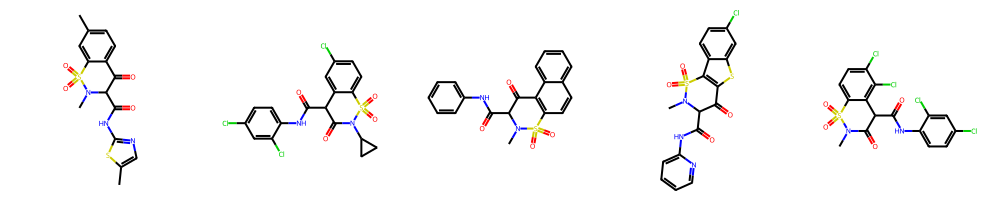

In [19]:
# Visualize the first 5 molecules from the SDF loaded in df["Mol"]
Draw.MolsToGridImage(df["Mol"].head(5), molsPerRow=5, subImgSize=(200,200))

In [4]:
finger_df = np.full((df.shape[0], 167), 0, dtype="float64")
for i in range(0, len(df.index)):
    finger_df[i, :] = np.array(rdMolDescriptors.GetMACCSKeysFingerprint(df['Mol'][i]))
finger_df = pd.DataFrame(finger_df, index=df['CHEMBLID'])
del (finger_df[0]) # removing Ithe empty coLumn
MACCSkeys_names = list(MACCSkeys.smartsPatts.values())
finger_df.columns = MACCSkeys_names
finger_df.head()

,"(?, 0)","([#104], 0)","([#32,#33,#34,#50,#51,#52,#82,#83,#84], 0)","([Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr], 0)","([Sc,Ti,Y,Zr,Hf], 0)","([La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu], 0)","([V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re], 0)","([!#6;!#1]1~*~*~*~1, 0)","([Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt], 0)","([Be,Mg,Ca,Sr,Ba,Ra], 0)",...,"([#6]-[#8], 0)","([#6]-[#7], 0)","([#8], 1)","([C;H3,H4], 0)","([#7], 0)","(a, 0)","(*1~*~*~*~*~*~1, 0)","([#8], 0)","([R], 0)","(?, 0)"
CHEMBLID,,,,,,,,,,,,,,,,,,,,,
CHEMBL366429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL176216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL174680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL176357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL369840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [45]:
Capstone_descr = pd.read_csv('./assets/chap8_output_halogen.csv', index_col="CHEMBLID")[["HalogenBondDonor"]]
Capstone_descr.head()
# len(Capstone_descr)

,HalogenBondDonor
CHEMBLID,
CHEMBL366429,False
CHEMBL176216,True
CHEMBL174680,False
CHEMBL176357,True
CHEMBL369840,True


In [50]:
df.head()
# len(df)

,SMILES,CHEMBLID,"Inhibition, %",ID,Mol
0,CN1C(C(=O)Nc2ncc(C)s2)C(=O)c2ccc(C)cc2S1(=O)=O,CHEMBL366429,35,CHEMBL366429,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...
1,Clc1ccc(NC(=O)C2C(=O)N(C3CC3)S(=O)(=O)c3ccc(Cl...,CHEMBL176216,59,CHEMBL176216,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...
2,CN1C(C(=O)Nc2ccccc2)C(=O)c2c(ccc3ccccc23)S1(=O)=O,CHEMBL174680,16,CHEMBL174680,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...
3,CN1C(C(=O)Nc2ccccn2)C(=O)c2sc3cc(Cl)ccc3c2S1(=...,CHEMBL176357,6,CHEMBL176357,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...
4,CN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2c(Cl)c(Cl)ccc...,CHEMBL369840,28,CHEMBL369840,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...


In [56]:
descr_df_full = pd.concat([Capstone_descr, descr_df, finger_df ], axis=1)
print(len(descr_df_full.columns))
descr_df_full.to_csv('./assets/chap10_output_descr.csv')
descr_df_full.tail()

171


,HalogenBondDonor,NumAromaticRings,NumValenceElectrons,BalabanJ,MW,"(?, 0)","([#104], 0)","([#32,#33,#34,#50,#51,#52,#82,#83,#84], 0)","([Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr], 0)","([Sc,Ti,Y,Zr,Hf], 0)",...,"([#6]-[#8], 0)","([#6]-[#7], 0)","([#8], 1)","([C;H3,H4], 0)","([#7], 0)","(a, 0)","(*1~*~*~*~*~*~1, 0)","([#8], 0)","([R], 0)","(?, 0)"
CHEMBLID,,,,,,,,,,,,,,,,,,,,,
CHEMBL174990,True,3.0,116.0,2.13,328.1,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL353327,True,2.0,142.0,2.09,446.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL177483,False,3.0,138.0,1.87,384.1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL177273,True,2.0,126.0,2.07,385.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL177982,False,3.0,132.0,1.86,387.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [63]:
# INCORRECT CODE
full_df_with_descr = pd.concat([df, Capstone_descr, descr_df, finger_df ], axis=1) # creates duplicate rows
full_df_with_descr

,SMILES,CHEMBLID,"Inhibition, %",ID,Mol,HalogenBondDonor,NumAromaticRings,NumValenceElectrons,BalabanJ,MW,...,"([#6]-[#8], 0)","([#6]-[#7], 0)","([#8], 1)","([C;H3,H4], 0)","([#7], 0)","(a, 0)","(*1~*~*~*~*~*~1, 0)","([#8], 0)","([R], 0)","(?, 0)"
0,CN1C(C(=O)Nc2ncc(C)s2)C(=O)c2ccc(C)cc2S1(=O)=O,CHEMBL366429,35.0,CHEMBL366429,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Clc1ccc(NC(=O)C2C(=O)N(C3CC3)S(=O)(=O)c3ccc(Cl...,CHEMBL176216,59.0,CHEMBL176216,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1C(C(=O)Nc2ccccc2)C(=O)c2c(ccc3ccccc23)S1(=O)=O,CHEMBL174680,16.0,CHEMBL174680,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CN1C(C(=O)Nc2ccccn2)C(=O)c2sc3cc(Cl)ccc3c2S1(=...,CHEMBL176357,6.0,CHEMBL176357,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CN1C(=O)C(C(=O)Nc2ccc(Cl)cc2Cl)c2c(Cl)c(Cl)ccc...,CHEMBL369840,28.0,CHEMBL369840,<rdkit.Chem.rdchem.Mol object at 0x000001DC403...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL174990,NaN,NaN,NaN,NaN,NaN,True,3.0,116.0,2.13,328.1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL353327,NaN,NaN,NaN,NaN,NaN,True,2.0,142.0,2.09,446.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL177483,NaN,NaN,NaN,NaN,NaN,False,3.0,138.0,1.87,384.1,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
CHEMBL177273,NaN,NaN,NaN,NaN,NaN,True,2.0,126.0,2.07,385.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


# Kennard stone algo

In [ ]:
from kenna

# morgan fingerprints in simdiv - stage 1

In [2]:
from rdkit.SimDivFilters import rdSimDivPickers
from rdkit import SimDivFilters
from rdkit import DataStructs

In [ ]:
# create morgan fingerprint representation
morgan_finger = []
bit_morgan = [{}] # label fingerprints
i = 0

for i in range(df['Mol']):
    morgan_finger = np.array(rdMolDescriptors.GetMorganFingerprintAsBitVect(df['Mol'][i], 2))
    bit_morgan[0][df['CHEMBLID'][i]] = morgan_finger

# morgan fingerprint in simdiv - stage 2

# morgan fingerprint in simdiv - stage 3

# morgan fingerprint in simdiv - stage 4

# morgan fingerprint in simdiv - stage 5

# minmax diversity concepts - quiz